In [36]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [37]:
data = input_data.read_data_sets('./data/fashion')

Extracting ./data/fashion/train-images-idx3-ubyte.gz
Extracting ./data/fashion/train-labels-idx1-ubyte.gz
Extracting ./data/fashion/t10k-images-idx3-ubyte.gz
Extracting ./data/fashion/t10k-labels-idx1-ubyte.gz


In [38]:
sample = data.train.next_batch(5000)
dataset = sample[0]
dataLabel = sample[1]
print(dataset.shape, dataLabel.shape)

(5000, 784) (5000,)


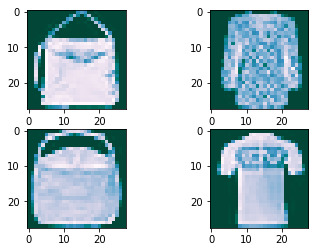

In [74]:
import random
import matplotlib.pyplot as plt

plt.subplot(221)
plt.imshow(dataset[random.randint(1, 500) + 100].reshape(28, 28), cmap=plt.get_cmap('PuBuGn_r'))
plt.subplot(222)
plt.imshow(dataset[random.randint(1, 500) + 200].reshape(28, 28), cmap=plt.get_cmap('PuBuGn_r'))
plt.subplot(223)
plt.imshow(dataset[random.randint(1, 500) + 300].reshape(28, 28), cmap=plt.get_cmap('PuBuGn_r'))
plt.subplot(224)
plt.imshow(dataset[random.randint(1, 500) + 400].reshape(28, 28), cmap=plt.get_cmap('PuBuGn_r'))
plt.show()
plt.close()

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
train_data, test_data, train_label, test_label = train_test_split(dataset, dataLabel, test_size=0.1)

data = [train_data, test_data, train_label, test_label, dataset, dataLabel]
for idx in data:
    print(idx.shape)
    print(type(idx))

(4500, 784)
<class 'numpy.ndarray'>
(500, 784)
<class 'numpy.ndarray'>
(4500,)
<class 'numpy.ndarray'>
(500,)
<class 'numpy.ndarray'>
(5000, 784)
<class 'numpy.ndarray'>
(5000,)
<class 'numpy.ndarray'>


In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
from sklearn.linear_model import LogisticRegression
logisticregression = LogisticRegression(C=0.1)
logisticregression.fit(train_data, train_label)
print(logisticregression.score(test_data, test_label))

0.824


In [68]:
print(logisticregression.score(train_data, train_label))

0.8817777777777778


In [78]:
import numpy as np

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


kf = KFold(n_splits=5, shuffle=False)

train_ans, test_ans = [], []
for train_index, test_index in kf.split(train_data):
    # print(train_index, test_index)
    train_data_kflod = train_data[train_index]
    test_data_kflod = train_data[test_index]
    train_label_kflod = train_label[train_index]
    test_label_kflod = train_label[test_index]
    # print(train_data_kflod.shape, test_data_kflod.shape)
    logisticregression = LogisticRegression(C=0.1)
    logisticregression.fit(train_data_kflod, train_label_kflod)
    
    predict_train_kflod = logisticregression.predict(test_data_kflod)
    predict_test = logisticregression.predict(test_data)
    
    print(accuracy_score(predict_test, test_label), accuracy_score(predict_train_kflod, test_label_kflod))
    
    train_ans = np.append(train_ans, predict_train_kflod)
    test_ans.append(predict_test)

0.81 0.8322222222222222
0.822 0.8222222222222222
0.824 0.8444444444444444
0.826 0.8133333333333334
0.814 0.8233333333333334


In [70]:
accuracy_score(train_ans, train_label)

0.8268888888888889

In [71]:
np.array(test_ans).shape

(5, 500)

In [77]:
from collections import Counter

ans = []
for sample in np.array(test_ans).T:
    ans.append(sorted(Counter(sample).items(), key=lambda x: x[1], reverse=True)[0][0])

print(accuracy_score(ans, test_label))

0.824


In [76]:
dict(Counter([1,1,1,2,2,2,3]))

{1: 3, 2: 3, 3: 1}